      Variance  Skewness  Kurtosis  Entropy  Class
0      3.62160   8.66610   -2.8073 -0.44699      0
1      4.54590   8.16740   -2.4586 -1.46210      0
2      3.86600  -2.63830    1.9242  0.10645      0
3      3.45660   9.52280   -4.0112 -3.59440      0
4      0.32924  -4.45520    4.5718 -0.98880      0
...        ...       ...       ...      ...    ...
1367   0.40614   1.34920   -1.4501 -0.55949      1
1368  -1.38870  -4.87730    6.4774  0.34179      1
1369  -3.75030 -13.45860   17.5932 -2.77710      1
1370  -3.56370  -8.38270   12.3930 -1.28230      1
1371  -2.54190  -0.65804    2.6842  1.19520      1

[1372 rows x 5 columns]

Model Evaluation
[[146  11]
 [ 14 104]]

Accuracy: 0.9090909090909091
Precision: 0.9043478260869565
Recall: 0.8813559322033898


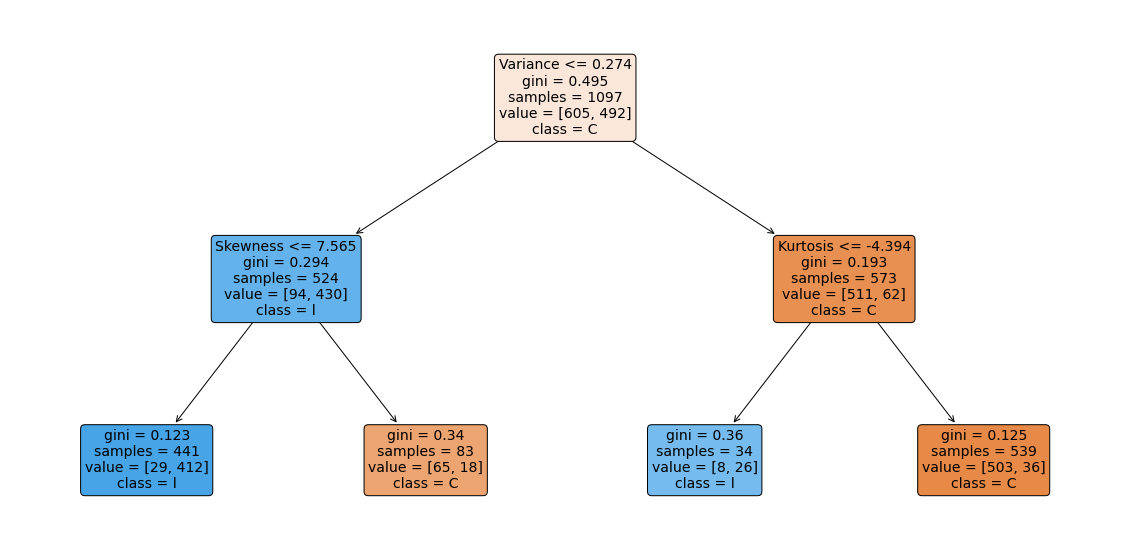

In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
PATH = "../datasets/"
CSV     = "bill_authentication.csv"
dataset = pd.read_csv(PATH + CSV)
X       = dataset.drop('Class', axis=1)
y       = dataset['Class']
print(dataset)

from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.20,
                                                    random_state=0)

from sklearn.tree import DecisionTreeClassifier
classifier = DecisionTreeClassifier(max_depth=2)
classifier.fit(X_train, y_train)

y_pred = classifier.predict(X_test)

from sklearn.metrics import classification_report, confusion_matrix

def showAccuracyScores(y_test, y_pred):
    print("\nModel Evaluation")
    cm = confusion_matrix(y_test, y_pred)
    print(cm)
    print("")
    tn = cm[0][0]
    fp = cm[0][1]
    tp = cm[1][1]
    fn = cm[1][0]
    accuracy  = (tp + tn)/(tn + fp + tp + fn)
    precision = tp/(tp + fp)
    recall    = tp/(tp + fn)
    print("Accuracy: " + str(accuracy))
    print("Precision: " + str(precision))
    print("Recall: " + str(recall))

showAccuracyScores(y_test, y_pred)

from sklearn.tree import plot_tree
fig, ax = plt.subplots(figsize=(20, 10))

plot_tree(classifier.fit(X_train, y_train), max_depth=4, fontsize=4)
a = plot_tree(classifier,
              feature_names=['Variance', 'Skewness', 'Kurtosis', 'Entropy'],
              class_names='Class',
              filled=True,
              rounded=True,
              fontsize=14)
plt.show()


In [3]:
import pandas as pd

PATH    = "../datasets/"
CSV     = "bill_authentication.csv"
dataset = pd.read_csv(PATH + CSV)
X       = dataset.drop('Class', axis=1)
y       = dataset['Class']

from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y,
                                                    test_size=0.20, random_state=0)

def manuallyClassify(X,y):
    predictions=[]
    ones = 0
    zeros = 0
    for i in range(0,len(X)):

        if(X.iloc[i]['Variance'] <= 0.274): # Blue
            if(X.iloc[i]['Skewness'] <= 7.565):
                ones +=1 #Blue
            else:
                zeros +=1
        else:
            if(X.iloc[i]['Kurtosis'] <= -4.394):
                ones += 1 # Blue
            else:
                zeros += 1

    print("Zeros: " + str(zeros))
    print("Ones: " + str(ones))

manuallyClassify(X_train,y_train)
print(len(X_train))

Zeros: 622
Ones: 475
1097


1.0.rc2

Model Evaluation
[[44  3]
 [ 1 66]]

Accuracy: 0.9649122807017544
Precision: 0.9565217391304348
Recall: 0.9850746268656716


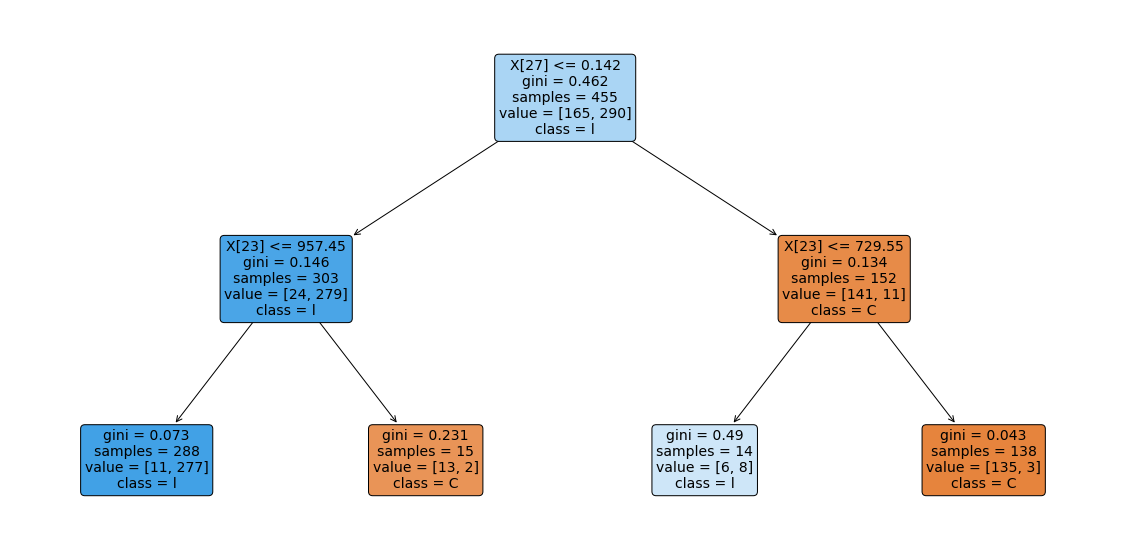

In [3]:
import sklearn.datasets as datasets
from   sklearn.tree import DecisionTreeClassifier
from   sklearn.tree import plot_tree
import matplotlib.pyplot as plt

# check for the sklearn version, it has to be 0.21
import sklearn
print(sklearn.__version__)
breast_cancer = datasets.load_breast_cancer()

from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(
    breast_cancer.data, breast_cancer.target, test_size=0.20,
    random_state=0)

classifier = DecisionTreeClassifier(max_depth=2)
classifier.fit(X_train, y_train)

y_pred = classifier.predict(X_test)

from sklearn.metrics import classification_report, confusion_matrix

def showAccuracyScores(y_test, y_pred):
    print("\nModel Evaluation")
    cm = confusion_matrix(y_test, y_pred)
    print(cm)
    print("")
    tn = cm[0][0]
    fp = cm[0][1]
    tp = cm[1][1]
    fn = cm[1][0]
    accuracy  = (tp + tn)/(tn + fp + tp + fn)
    precision = tp/(tp + fp)
    recall    = tp/(tp + fn)
    print("Accuracy: " + str(accuracy))
    print("Precision: " + str(precision))
    print("Recall: " + str(recall))

showAccuracyScores(y_test, y_pred)

fig, ax = plt.subplots(figsize=(20, 10))

plot_tree(classifier.fit(X_train, y_train), max_depth=4, fontsize=4)
a = plot_tree(classifier,
              class_names='Class',
              filled=True,
              rounded=True,
              fontsize=14)
plt.show()

In [4]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
PATH = "../datasets/"
CSV  = "petrol_consumption.csv"
df   = pd.read_csv(PATH + CSV)

# Show all columns.
pd.set_option('display.max_columns', None)
# Increase number of columns that display on one line.
pd.set_option('display.width', 1000)

X = df.drop('Petrol_Consumption', axis=1)
y = df['Petrol_Consumption']
print(df)

from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=0)

from sklearn.tree import DecisionTreeRegressor
regressor = DecisionTreeRegressor()
regressor.fit(X_train, y_train)

y_pred = regressor.predict(X_test)

df=pd.DataFrame({'Actual':y_test, 'Predicted':y_pred})
print("\nActual versus predicted values")
print(df)

from sklearn import metrics
print('Mean Absolute Error:', metrics.mean_absolute_error(y_test, y_pred))
print('Mean Squared Error:', metrics.mean_squared_error(y_test, y_pred))
print('Root Mean Squared Error:',
      np.sqrt(metrics.mean_squared_error(y_test, y_pred)))

    Petrol_tax  Average_income  Paved_Highways  Population_Driver_licence(%)  Petrol_Consumption
0         9.00            3571            1976                         0.525                 541
1         9.00            4092            1250                         0.572                 524
2         9.00            3865            1586                         0.580                 561
3         7.50            4870            2351                         0.529                 414
4         8.00            4399             431                         0.544                 410
5        10.00            5342            1333                         0.571                 457
6         8.00            5319           11868                         0.451                 344
7         8.00            5126            2138                         0.553                 467
8         8.00            4447            8577                         0.529                 464
9         7.00            4512